In [1]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.resnet import ResNet50
from keras.applications import VGG16
from tensorboard import notebook
from tensorflow import keras 
from tensorflow.keras.applications.resnet import ResNet50
import numpy as np
import sys
sys.path.append("/root/autodl-tmp/training_tool/")
from training_tool import load_data, draw_curve, draw_matrix, TimeHistory

2023-12-10 19:31:23.359007: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


100%|██████████| 186/186 [00:00<00:00, 193.69it/s]


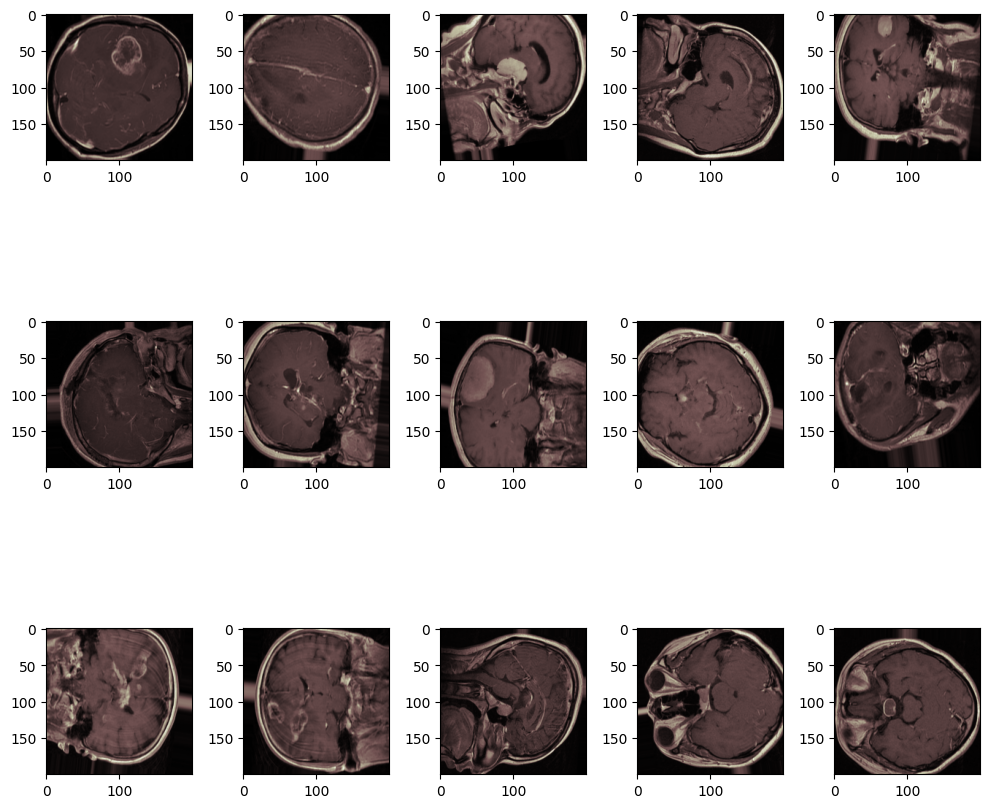

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)


In [3]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)

In [2]:
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, Conv2D, BatchNormalization, MaxPool2D, Flatten
import warnings
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.models import Model
from keras.utils import get_source_inputs
from keras.utils import get_file
from keras.utils import layer_utils

image_size = 200
alexnet_cnn = Sequential()
alexnet_cnn.add(Conv2D(96, kernel_size = 11, strides = 4, activation = 'relu', input_shape = (image_size, image_size, 3), name = 'Conv2D-1'))
alexnet_cnn.add(BatchNormalization(name = 'Batch-Normalization-1'))
alexnet_cnn.add(MaxPool2D(pool_size = 3, strides = 2, name = 'Max-Pooling-1'))
alexnet_cnn.add(Conv2D(256, kernel_size = 5, padding = 'same', activation = 'relu', name = 'Conv2D-2'))
alexnet_cnn.add(BatchNormalization(name = 'Batch-Normalization-2'))
alexnet_cnn.add(MaxPool2D(pool_size = 3, strides = 2, name = 'Max-Pooling-2'))
alexnet_cnn.add(Conv2D(384, kernel_size = 3, padding = 'same', activation = 'relu', name = 'Conv2D-3'))
alexnet_cnn.add(BatchNormalization(name = 'Batch-Normalization-3'))
alexnet_cnn.add(Conv2D(384, kernel_size = 3, padding = 'same', activation = 'relu', name = 'Conv2D-4'))
alexnet_cnn.add(BatchNormalization(name = 'Batch-Normalization-4'))
alexnet_cnn.add(Conv2D(256, kernel_size = 3, padding = 'same', activation = 'relu', name = 'Conv2D-5'))
alexnet_cnn.add(BatchNormalization(name = 'Batch-Normalization-5'))
alexnet_cnn.add(MaxPool2D(pool_size = 3, strides = 2, name = 'Max-Pooling-3'))
alexnet_cnn.add(Flatten(name = 'Flatten-Layer-1'))
alexnet_cnn.add(Dense(128, activation = 'relu', name = 'Hidden-Layer-1'))
alexnet_cnn.add(Dropout(rate = 0.5, name = 'Dropout-Layer-1'))
alexnet_cnn.add(Dense(64, activation = 'relu', name = 'Hidden-Layer-2'))
alexnet_cnn.add(Dropout(rate = 0.5, name = 'Dropout-Layer-2'))
alexnet_cnn.add(Dense(3, activation = 'softmax', name = 'Output-Layer'))

2023-12-10 19:31:31.451808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-10 19:31:31.880986: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22134 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:42:00.0, compute capability: 8.9


In [6]:
net = alexnet_cnn
adam = keras.optimizers.Adam(learning_rate=0.0001)
net.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D-1 (Conv2D)           (None, 48, 48, 96)        34944     
                                                                 
 Batch-Normalization-1 (Batc  (None, 48, 48, 96)       384       
 hNormalization)                                                 
                                                                 
 Max-Pooling-1 (MaxPooling2D  (None, 23, 23, 96)       0         
 )                                                               
                                                                 
 Conv2D-2 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 Batch-Normalization-2 (Batc  (None, 23, 23, 256)      1024      
 hNormalization)                                                 
                                                        

In [7]:
tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-AlexNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = net.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])

Epoch 1/50


2023-12-10 19:09:52.502676: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-12-10 19:09:53.056768: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-12-10 19:09:53.056809: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-12-10 19:09:53.057015: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-10 19:09:53.542982: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 1.1669 - accuracy: 0.3972
Epoch 1: saving model to model-ARM-Net.h5
Epoch 1: 6.41 seconds
264/264 [==============================] - 6s 12ms/step - loss: 1.1669 - accuracy: 0.3972 - val_loss: 1.2728 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
260/264 [============================>.] - ETA: 0s - loss: 0.9847 - accuracy: 0.5076
Epoch 2: saving model to model-ARM-Net.h5
Epoch 2: 2.28 seconds
264/264 [==============================] - 2s 9ms/step - loss: 0.9824 - accuracy: 0.5092 - val_loss: 1.0278 - val_accuracy: 0.4431 - lr: 1.0000e-04
Epoch 3/50
260/264 [============================>.] - ETA: 0s - loss: 0.8359 - accuracy: 0.6527
Epoch 3: saving model to model-ARM-Net.h5
Epoch 3: 2.26 seconds
264/264 [==============================] - 2s 9ms/step - loss: 0.8348 - accuracy: 0.6530 - val_loss: 1.4079 - val_accuracy: 0.5446 - lr: 1.0000e-04
Epoch 4/50
260/264 [============================>.] - ETA: 0s - loss: 0.7302 - accurac

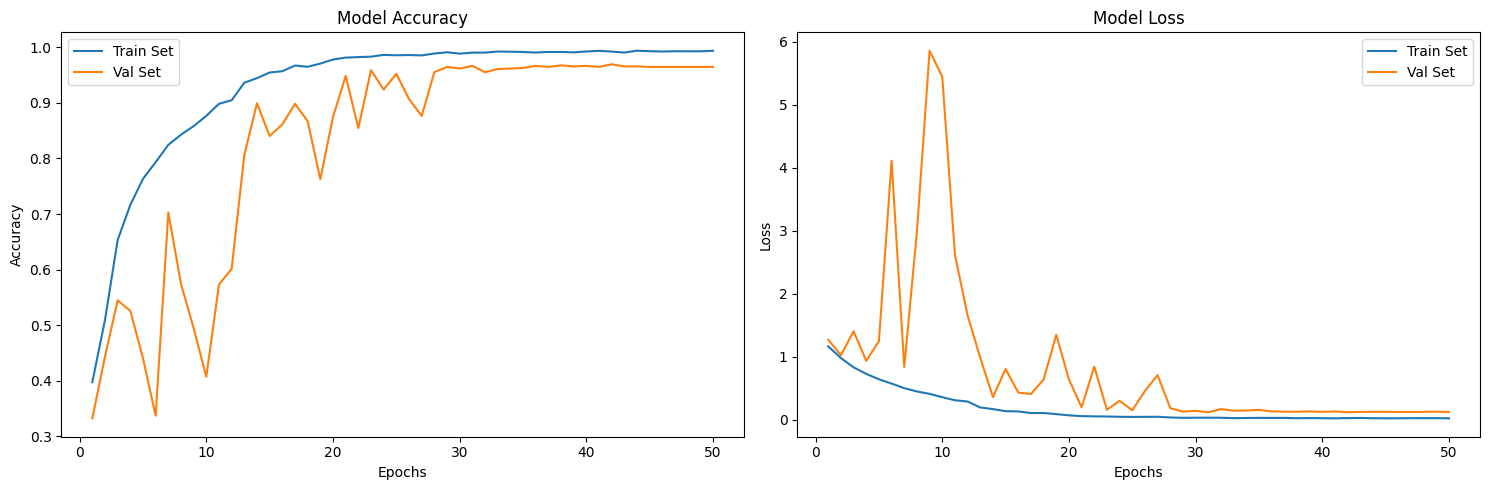

In [8]:
draw_curve(history)

20/20 [==============================] - 0s 4ms/step - loss: 0.3056 - accuracy: 0.9560
Test Accuracy:  95.6
              precision    recall  f1-score   support

      glioma     0.9621    0.9755    0.9688       286
  meningioma     0.9478    0.8944    0.9203       142
   pituitary     0.9526    0.9731    0.9628       186

    accuracy                         0.9560       614
   macro avg     0.9542    0.9477    0.9506       614
weighted avg     0.9559    0.9560    0.9557       614



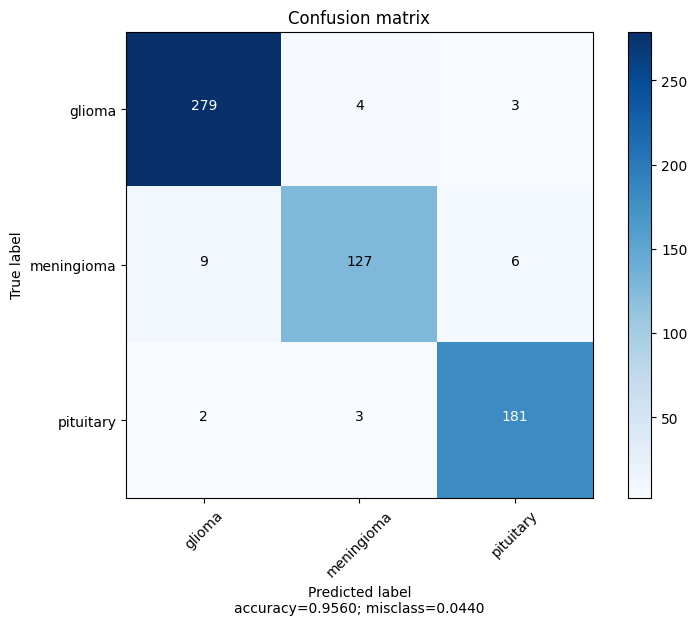

In [9]:
pred = net.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = net.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

In [10]:
%reset -f

100%|██████████| 186/186 [00:00<00:00, 194.03it/s]


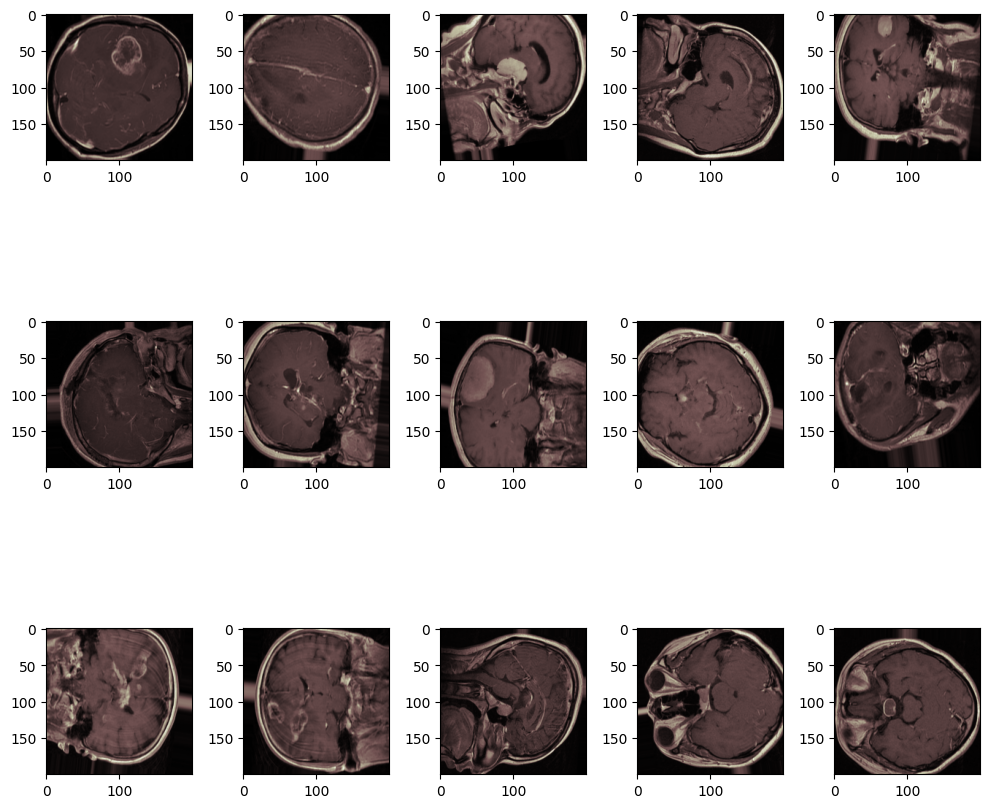

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
258/264 [============================>.] - ETA: 0s - loss: 1.1098 - accuracy: 0.4438
Epoch 1: saving model to model-AlexNet.h5
Epoch 1: 4.03 seconds
264/264 [==============================] - 4s 11ms/step - loss: 1.1087 - accuracy: 0.4425 - val_loss: 3.5320 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
260/264 [============================>.] - ETA: 0s - loss: 0.9138 - accuracy: 0.5682
Epoch 2: saving model to model-AlexNet.h5
Epoch 2: 2.33 seconds
264/264 [==============================] - 2s 9ms/step - loss: 0.9120 - accuracy: 0.5701 - val_loss: 1.4475 - val_accuracy: 0.4573 - lr: 1.0000e-04
Epoch 3/50
260/264 [============================>.] - ETA: 0s - loss: 0.7601 - accuracy: 0.6900
Epoch 3: saving model to model-AlexNet.h5
Epoch 3: 2.31 seconds
264/264 [==============================] - 2s 9ms/step - loss: 0.7586 - accuracy: 0.6906 - val_loss: 1.1180 - val_accuracy: 0.4934 - lr: 1.0000e-04
Epoch 4/50
260/

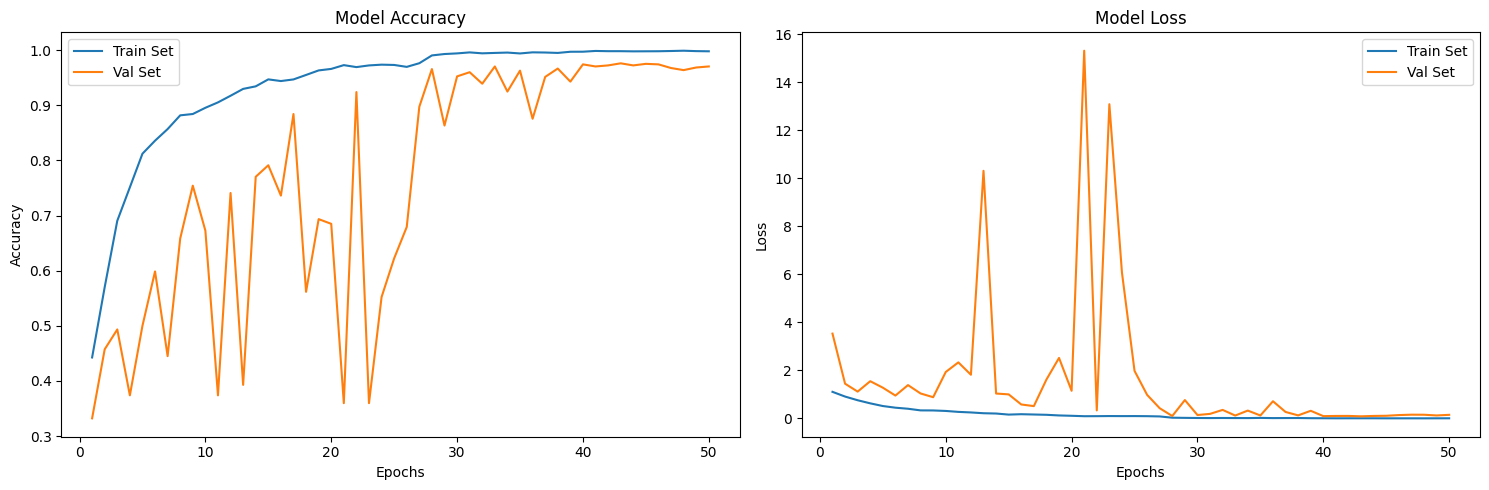

20/20 [==============================] - 0s 4ms/step - loss: 0.4254 - accuracy: 0.9479
Test Accuracy:  94.79
              precision    recall  f1-score   support

      glioma     0.9815    0.9301    0.9551       286
  meningioma     0.8599    0.9507    0.9030       142
   pituitary     0.9731    0.9731    0.9731       186

    accuracy                         0.9479       614
   macro avg     0.9382    0.9513    0.9437       614
weighted avg     0.9509    0.9479    0.9485       614



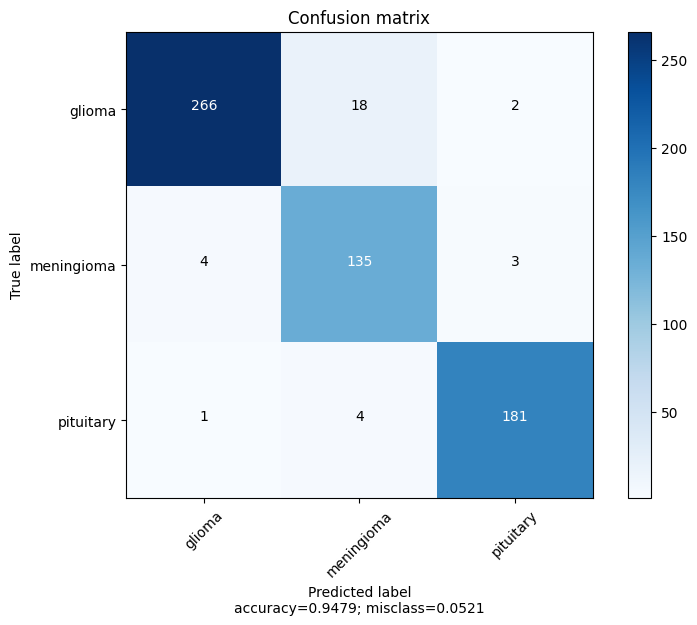

In [14]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = alexnet_cnn
adam = keras.optimizers.Adam(learning_rate=0.0001)
net.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-AlexNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = net.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = net.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = net.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 195.56it/s]


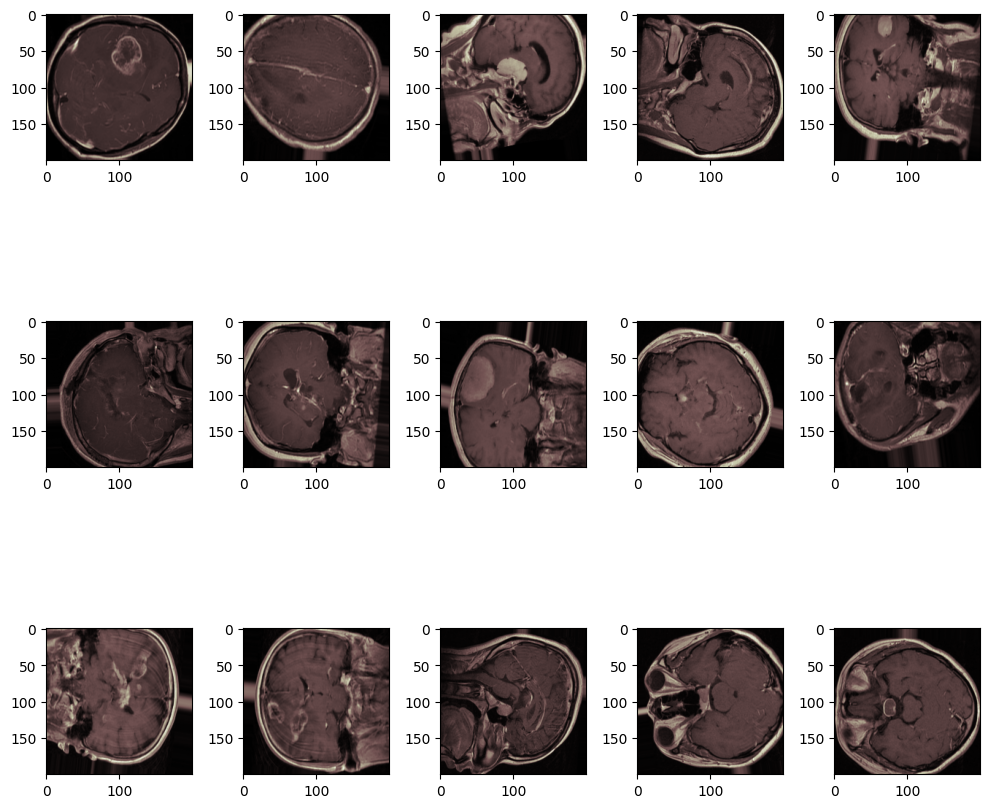

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
261/264 [============================>.] - ETA: 0s - loss: 1.1647 - accuracy: 0.4507
Epoch 1: saving model to model-AlexNet.h5
Epoch 1: 3.36 seconds
264/264 [==============================] - 3s 11ms/step - loss: 1.1636 - accuracy: 0.4511 - val_loss: 1.7254 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
260/264 [============================>.] - ETA: 0s - loss: 0.9469 - accuracy: 0.5582
Epoch 2: saving model to model-AlexNet.h5
Epoch 2: 2.33 seconds
264/264 [==============================] - 2s 9ms/step - loss: 0.9465 - accuracy: 0.5584 - val_loss: 0.8336 - val_accuracy: 0.6328 - lr: 1.0000e-04
Epoch 3/50
259/264 [============================>.] - ETA: 0s - loss: 0.7862 - accuracy: 0.6778
Epoch 3: saving model to model-AlexNet.h5
Epoch 3: 2.37 seconds
264/264 [==============================] - 2s 9ms/step - loss: 0.7847 - accuracy: 0.6789 - val_loss: 1.3604 - val_accuracy: 0.5408 - lr: 1.0000e-04
Epoch 4/50
260/

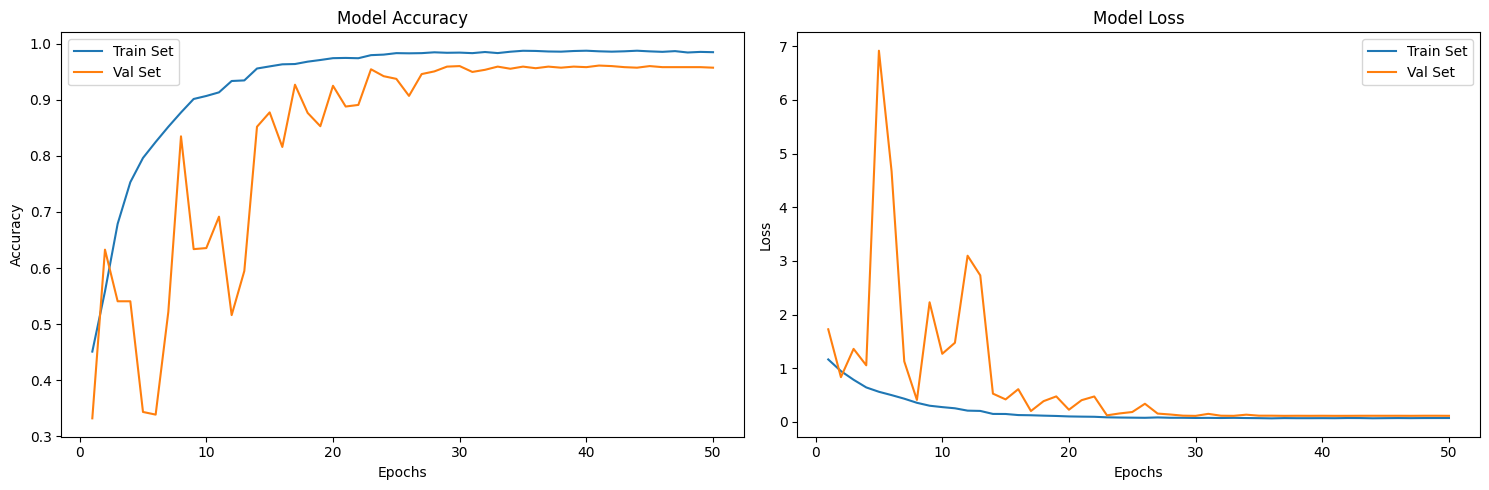

20/20 [==============================] - 0s 4ms/step - loss: 0.2488 - accuracy: 0.9446
Test Accuracy:  94.46
              precision    recall  f1-score   support

      glioma     0.9550    0.9650    0.9600       286
  meningioma     0.9078    0.9014    0.9046       142
   pituitary     0.9565    0.9462    0.9514       186

    accuracy                         0.9446       614
   macro avg     0.9398    0.9376    0.9386       614
weighted avg     0.9446    0.9446    0.9446       614



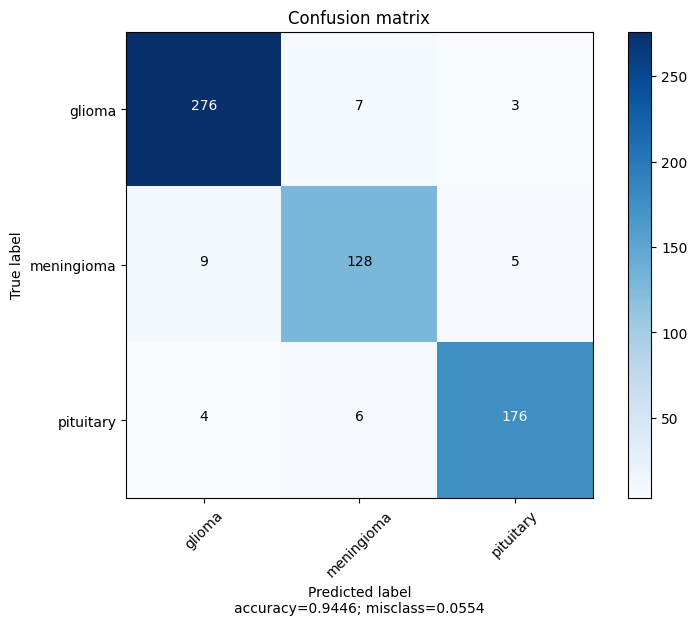

In [17]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = alexnet_cnn
adam = keras.optimizers.Adam(learning_rate=0.0001)
net.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-AlexNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = net.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = net.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = net.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 194.99it/s]


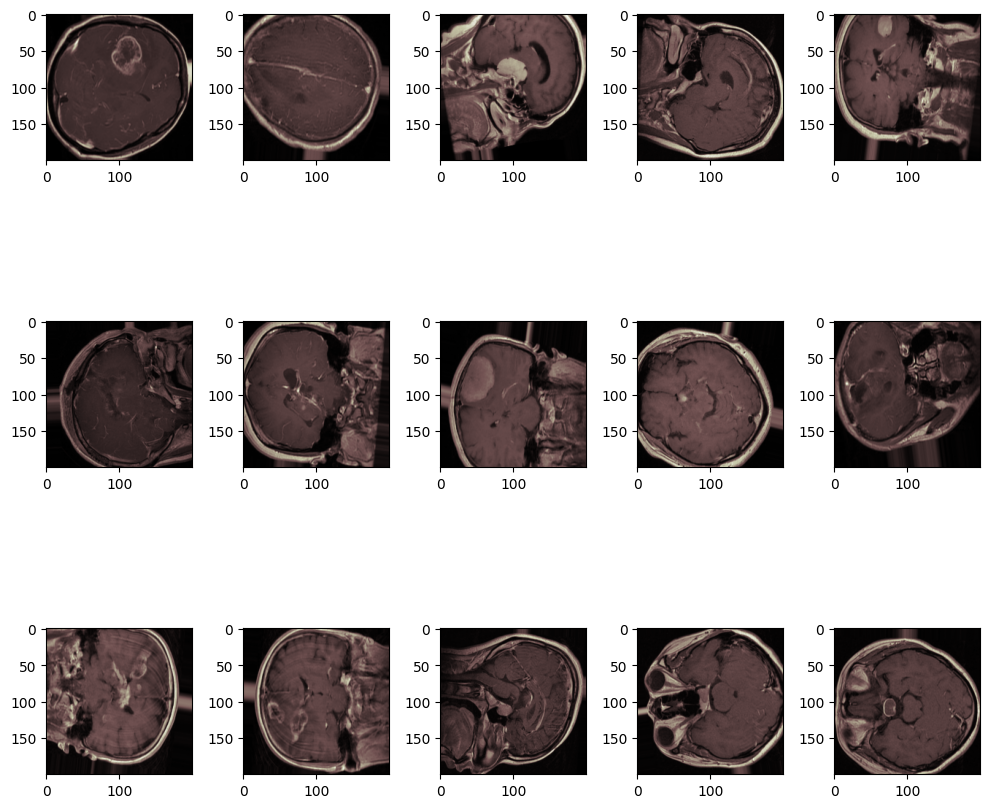

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50
260/264 [============================>.] - ETA: 0s - loss: 1.1112 - accuracy: 0.4812
Epoch 1: saving model to model-AlexNet.h5
Epoch 1: 3.35 seconds
264/264 [==============================] - 3s 11ms/step - loss: 1.1081 - accuracy: 0.4825 - val_loss: 2.1642 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
260/264 [============================>.] - ETA: 0s - loss: 0.8406 - accuracy: 0.6207
Epoch 2: saving model to model-AlexNet.h5
Epoch 2: 2.34 seconds
264/264 [==============================] - 2s 9ms/step - loss: 0.8397 - accuracy: 0.6212 - val_loss: 0.8304 - val_accuracy: 0.6015 - lr: 1.0000e-04
Epoch 3/50
260/264 [============================>.] - ETA: 0s - loss: 0.7403 - accuracy: 0.6913
Epoch 3: saving model to model-AlexNet.h5
Epoch 3: 2.34 seconds
264/264 [==============================] - 2s 9ms/step - loss: 0.7401 - accuracy: 0.6917 - val_loss: 1.3766 - val_accuracy: 0.5361 - lr: 1.0000e-04
Epoch 4/50
260/

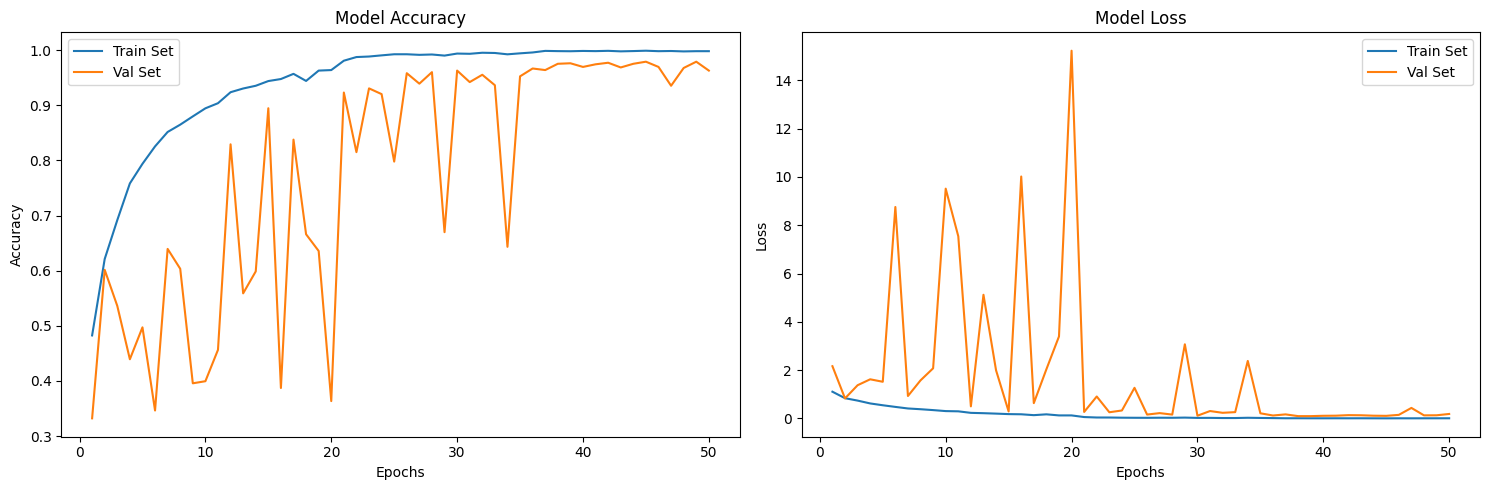

20/20 [==============================] - 0s 5ms/step - loss: 0.3968 - accuracy: 0.9381
Test Accuracy:  93.81
              precision    recall  f1-score   support

      glioma     0.9545    0.9545    0.9545       286
  meningioma     0.8742    0.9296    0.9010       142
   pituitary     0.9661    0.9194    0.9421       186

    accuracy                         0.9381       614
   macro avg     0.9316    0.9345    0.9326       614
weighted avg     0.9395    0.9381    0.9384       614



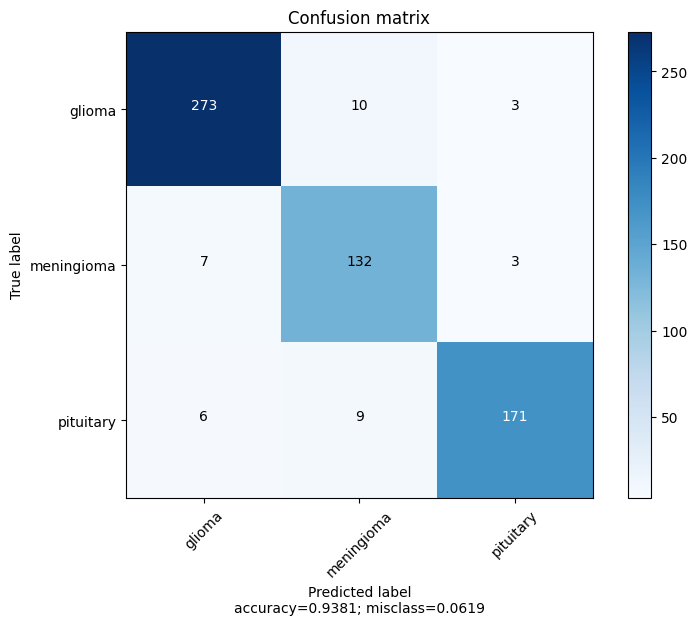

In [20]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = alexnet_cnn
adam = keras.optimizers.Adam(learning_rate=0.0001)
net.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-AlexNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = net.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = net.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = net.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f

100%|██████████| 186/186 [00:00<00:00, 194.77it/s]


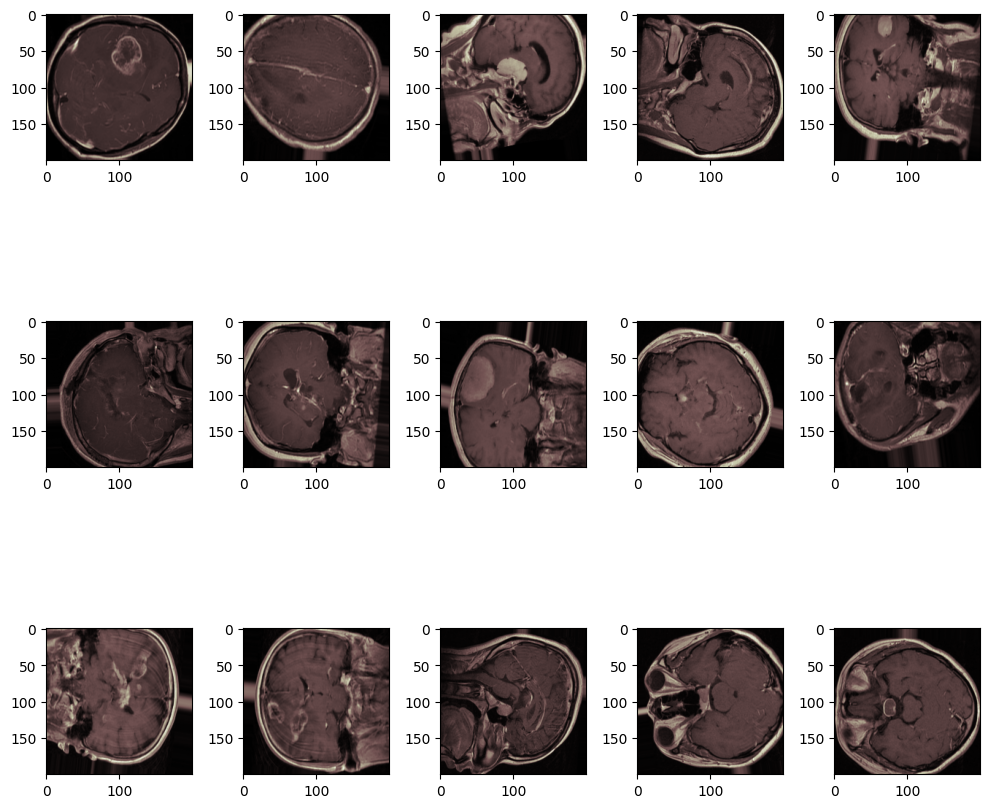

(614, 200, 200, 3)
(10536, 200, 200, 3)
(614, 3)
(10536, 3)
Epoch 1/50


2023-12-10 19:32:39.101959: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-12-10 19:32:39.651951: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-12-10 19:32:39.651986: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-12-10 19:32:39.652186: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


  1/264 [..............................] - ETA: 13:15 - loss: 3.0453 - accuracy: 0.3333

2023-12-10 19:32:40.163339: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 1.1687 - accuracy: 0.4439
Epoch 1: saving model to model-AlexNet.h5
Epoch 1: 6.21 seconds
264/264 [==============================] - 6s 12ms/step - loss: 1.1687 - accuracy: 0.4439 - val_loss: 2.6880 - val_accuracy: 0.3321 - lr: 1.0000e-04
Epoch 2/50
260/264 [============================>.] - ETA: 0s - loss: 0.9408 - accuracy: 0.5751
Epoch 2: saving model to model-AlexNet.h5
Epoch 2: 2.34 seconds
264/264 [==============================] - 2s 9ms/step - loss: 0.9401 - accuracy: 0.5757 - val_loss: 1.4754 - val_accuracy: 0.4213 - lr: 1.0000e-04
Epoch 3/50
260/264 [============================>.] - ETA: 0s - loss: 0.8056 - accuracy: 0.6621
Epoch 3: saving model to model-AlexNet.h5
Epoch 3: 2.36 seconds
264/264 [==============================] - 2s 9ms/step - loss: 0.8031 - accuracy: 0.6632 - val_loss: 0.9506 - val_accuracy: 0.6452 - lr: 1.0000e-04
Epoch 4/50
260/264 [============================>.] - ETA: 0s - loss: 0.6534 - accurac

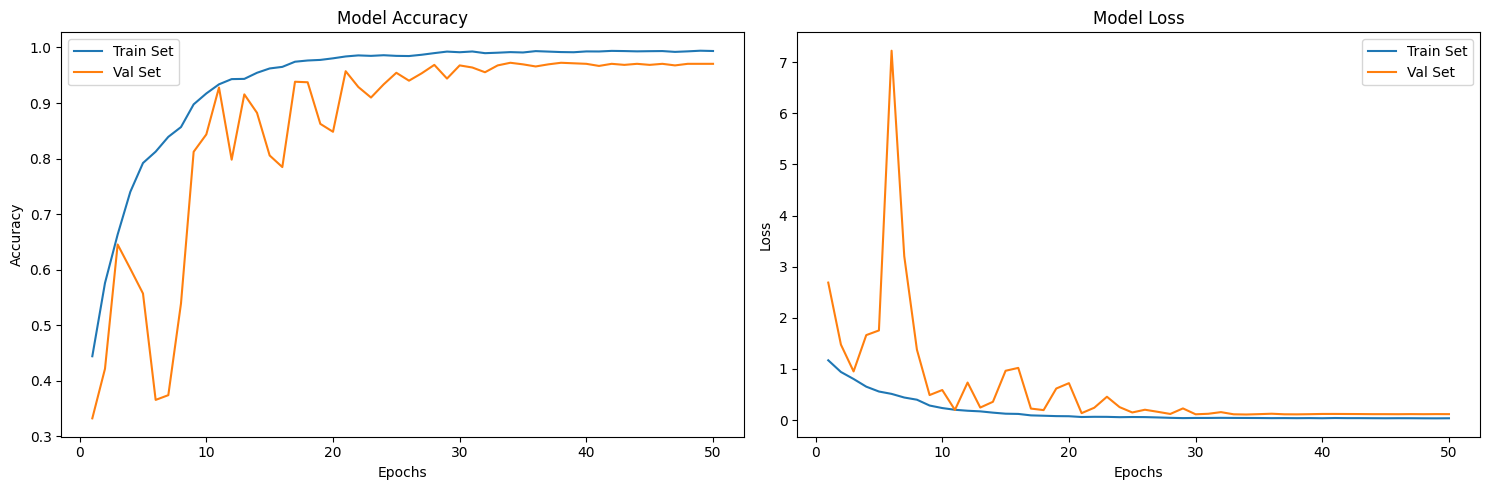

20/20 [==============================] - 0s 4ms/step - loss: 0.2742 - accuracy: 0.9446
Test Accuracy:  94.46
              precision    recall  f1-score   support

      glioma     0.9615    0.9615    0.9615       286
  meningioma     0.9137    0.8944    0.9039       142
   pituitary     0.9418    0.9570    0.9493       186

    accuracy                         0.9446       614
   macro avg     0.9390    0.9376    0.9383       614
weighted avg     0.9445    0.9446    0.9445       614



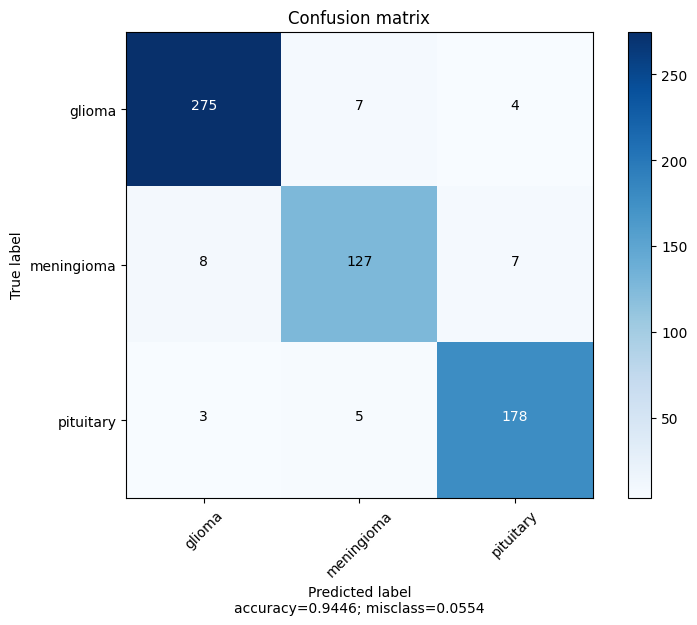

In [3]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 200
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)


net = alexnet_cnn
adam = keras.optimizers.Adam(learning_rate=0.0001)
net.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-AlexNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = net.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])


draw_curve(history)
pred = net.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = net.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)
%reset -f